In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [ ]:
# Import Data

In [5]:
covid_us = pd.read_csv(r'/Users/samantha/Documents/COVID Analysis/02 Data/Prepared Data/5-14_c19_total_us.csv', index_col = False)

In [ ]:
# Create Path Name

In [6]:
path = r'/Users/samantha/Documents/COVID Analysis'

In [7]:
covid_us = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '5-14_c19_total_us.csv'), index_col = False)

In [ ]:
##### 6.2.2 Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

In [ ]:
# Hypotheses
    # 1. If COVID-19 deaths are increased in vulnerable geographical regions and/or states, then influenza deaths and 
    #    pneumonia deaths will increase.
    #    Variables: COVID-19 deaths vs FLU/PNA deaths in vulnerable states

    # 2. For persons over the age of 65, deaths from COVID-19, influenza and/or pneumonia will be increased. 
    #    Variables: Age 65+ vs C19/FLU/PNA deaths

    # 3. For deaths in the inpatient healthcare setting, deaths for COVID-19, influenza and/or pneumonia will be 
    #    increased due to having previously established death reporting methods and due to more access to reliable 
    #    diagnostic tools and medical experts.
    #    Variables: Inpatient healthcare setting deaths vs C19/FLU/PNA deaths in all settings

In [ ]:
##### 6.2.3a Create a correlation matrix heatmap (colored).

In [ ]:
# Create a correlation matrix using pandas

In [8]:
covid_us.corr()

,C19 Deaths,Flu Deaths,PNA Deaths,C19 & PNA Deaths,"C19, PNA or Flu Deaths",Total Deaths
C19 Deaths,1.000000,0.995674,0.994987,0.988985,0.999703,0.928923
Flu Deaths,0.995674,1.000000,0.992755,0.986459,0.996230,0.939185
PNA Deaths,0.994987,0.992755,1.000000,0.998095,0.996468,0.898550
C19 & PNA Deaths,0.988985,0.986459,0.998095,1.000000,0.990424,0.874944
"C19, PNA or Flu Deaths",0.999703,0.996230,0.996468,0.990424,1.000000,0.926927
Total Deaths,0.928923,0.939185,0.898550,0.874944,0.926927,1.000000


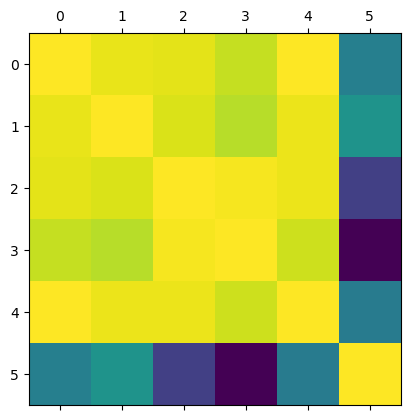

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(covid_us.corr())
plt.show()

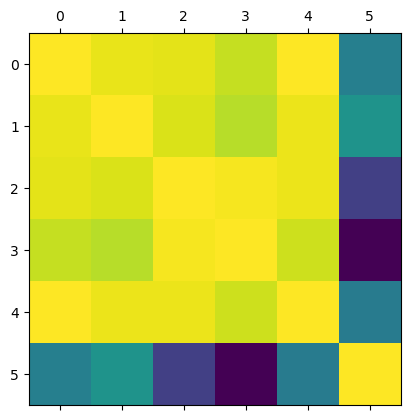

In [12]:
# Save figure
plt.matshow(covid_us.corr())
plt.savefig("out.png") 

In [13]:
# check current directory
cwd = os.getcwd()
cwd

'/Users/samantha/Documents/COVID Analysis/03 Scripts'

In [ ]:
# Add labels, a legend, and change the size of the heatmap

Text(0.5, 1.0, 'Correlation Matrix for COVID, Flu and PNA in the US')

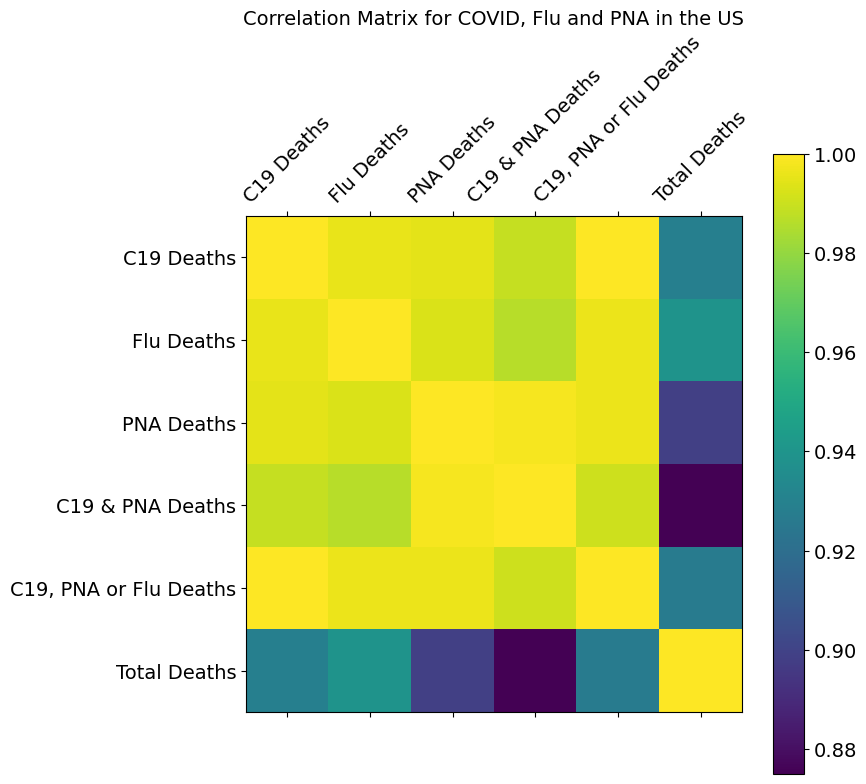

In [14]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(covid_us.corr(), fignum=f.number) # type of plot
plt.xticks(range(covid_us.shape[1]), covid_us.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(covid_us.shape[1]), covid_us.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix for COVID, Flu and PNA in the US', fontsize=14) # add title

In [ ]:
##### 6.2.3b Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [ ]:
# The co-efficients in the plot range from 0.88 - 1.0, which indicate strong relationships between all variables.
# However, the strongest and most meaningful relationships are between:
#     C19 Deaths and Flu Deaths
#     C19 Deaths and PNA Deaths

# These results suggest this hypothesis is correct:
#   1. If COVID-19 deaths are increased in vulnerable geographical regions and/or states, then influenza deaths and 
#      pneumonia deaths will increase.

In [ ]:
##### 6.2.4a Create a scatterplot (or plots) for the variables with the strongest correlations and examine 
#     the nature of their relationships.

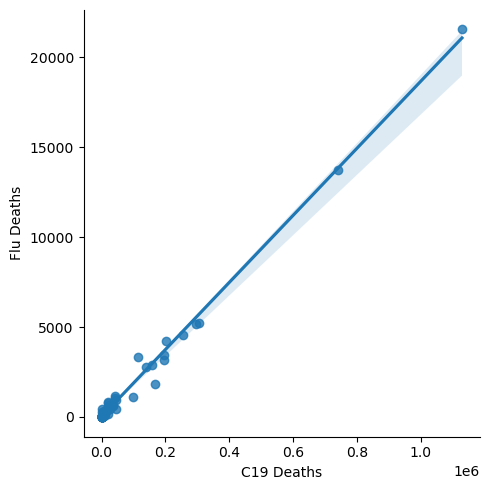

In [16]:
# Create a scatterplot for the "C19 Deaths" and "Flu Deaths" columns in seaborn

sns.lmplot(x = 'C19 Deaths', y = 'Flu Deaths', data = covid_us)

In [ ]:
# Discuss the output in a markdown cell

In [ ]:
# Scatterplot for the "C19 Deaths" and "Flu Deaths"
# The output shows there is a strong relationship between C19 Deaths and Flu Deaths
# Again, this supports the hypothesis of increased C19 deaths also means increased Flu Deaths

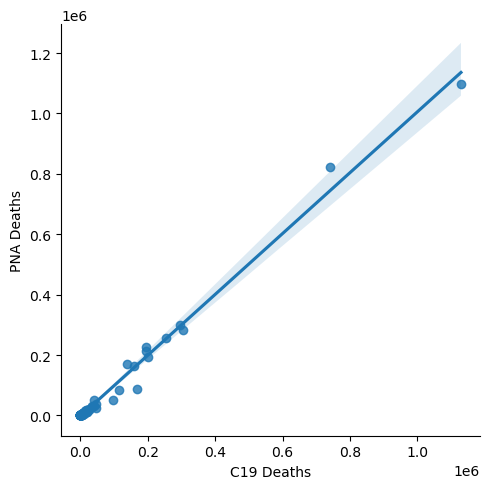

In [17]:
# Create a scatterplot for the "C19 Deaths" and "PNA Deaths" columns in seaborn

sns.lmplot(x = 'C19 Deaths', y = 'PNA Deaths', data = covid_us)

In [ ]:
# Discuss the output in a markdown cell

In [ ]:
# Scatterplot for the "C19 Deaths" and "PNA Deaths"
# The output shows there is a strong relationship between C19 Deaths and PNA Deaths
# Again, this supports the hypothesis of increased C19 deaths also means increased PNA Deaths

In [ ]:
#6.2.5a Create a pair plot of the entire data set

In [18]:
covid_us_2 = covid_us[['C19 Deaths', 'Flu Deaths', 'PNA Deaths', 'C19 & PNA Deaths', 'C19, PNA or Flu Deaths', 'Total Deaths']]

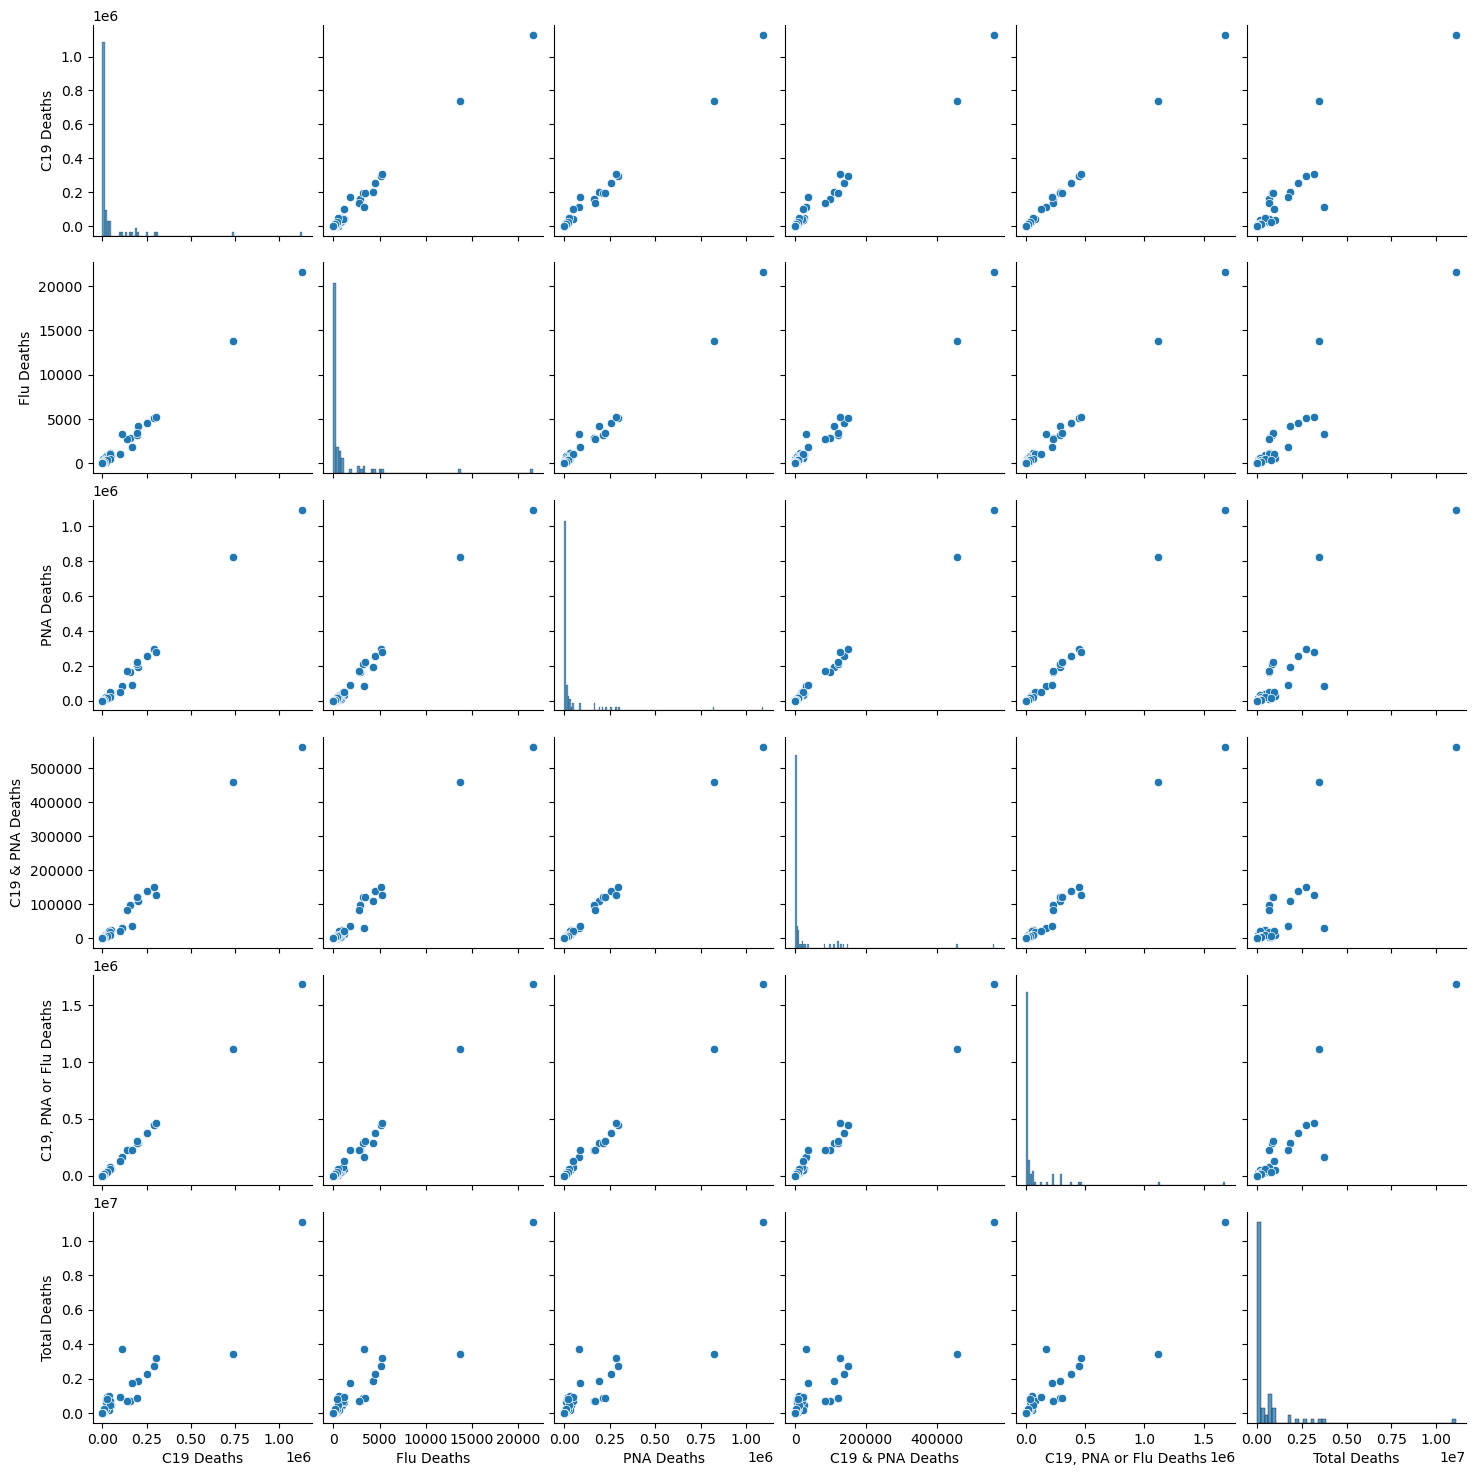

In [19]:
g = sns.pairplot(covid_us_2)

In [ ]:
##### 6.2.5b Comment on the distribution of the variables and mark variables you’d like to explore further with an 
#     explanation of why.

In [ ]:
# The distribution of the variables suggest strong relationships between all the variables noted above. 
# I would still like to explore the following relationships 
#     C19 Deaths and Flu Deaths
#     C19 Deaths and PNA Deaths
# The reason for this is Flu Deaths and PNA deaths were originally included in the dataset from the National Center of
#     Health Statistics to examine relationships between the diagnoses. One prediction I read in the technical report
#     was C19 might be often misdiagnosed as Flu or PNA since some symptoms overlap. 

In [ ]:
#6.2.6 Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='C19 Deaths', ylabel='Count'>

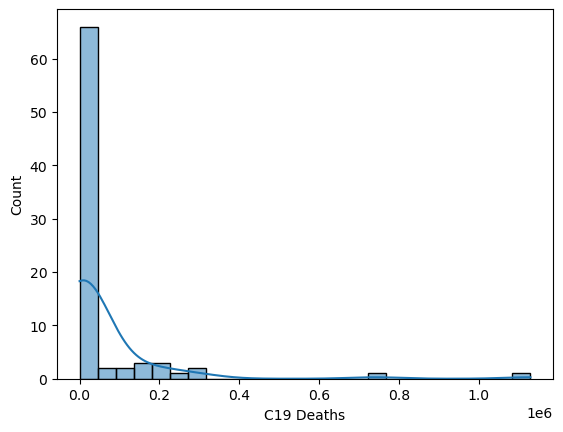

In [33]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(covid_us['C19 Deaths'], bins = 25, kde = True)

In [34]:
covid_us.loc[covid_us['C19 Deaths'] < 0.2, 'C19 Count Category'] = 'Low'

In [35]:
covid_us.loc[(covid_us['C19 Deaths'] >= 0.2) & (covid_us['C19 Deaths'] < 50), 'C19 Count Category'] = 'Middle'

In [36]:
covid_us.loc[covid_us['C19 Deaths'] >= 0.7, 'C19 Count Category'] = 'High'

In [37]:
covid_us['C19 Count Category'].value_counts(dropna = False)

High    79
Low      2
Name: C19 Count Category, dtype: int64

In [38]:
covid_us.columns

Index(['C19 Deaths', 'Flu Deaths', 'PNA Deaths', 'C19 & PNA Deaths',
       'C19, PNA or Flu Deaths', 'Total Deaths', 'C19 Count Category'],
      dtype='object')

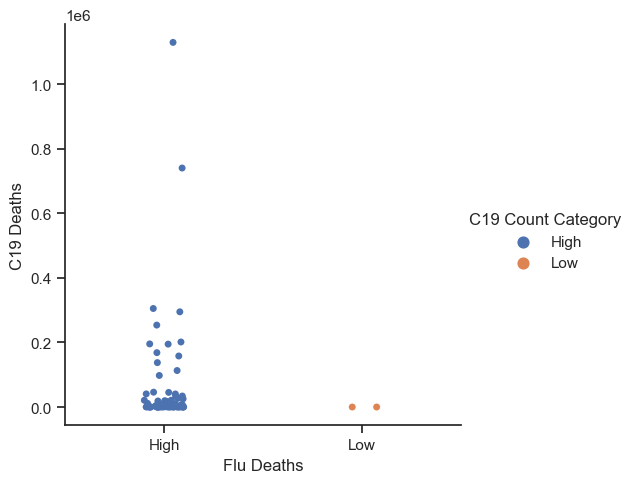

In [40]:
# Create a categorical plot for C19 vs Flu in seaborn using the C19 Count Categories created above

sns.set(style="ticks")
g = sns.catplot(x="Flu Deaths", y="C19 Deaths", hue="C19 Count Category", data=covid_us)

In [46]:
# fig = g.get_figure()
g.savefig("out.png") 

In [ ]:
# Interpret the results
# The results indicate that when there is a high C19 death count, there is also a high flu death count

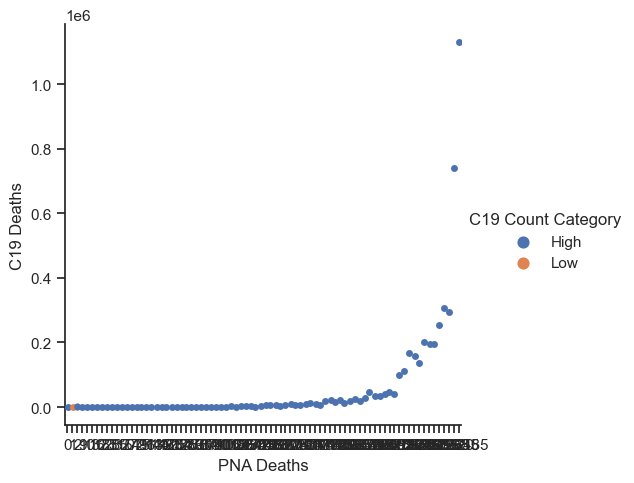

In [47]:
# Create a categorical plot for C19 vs PNA in seaborn using the C19 Count Categories created above

sns.set(style="ticks")
g = sns.catplot(x="PNA Deaths", y="C19 Deaths", hue="C19 Count Category", data=covid_us)

In [ ]:
# Interpret the results
# I'm not sure what happened here. I also tried 'Total Deaths', and got a similar results. When I tried 'Flu Deaths'
#     a second time, result looked like the C19 vs Flu Deaths catplot above. 

In [ ]:
##### 6.2.7 Revisit the questions you generated in the previous task and write answers to those you can based on the 
#     exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in 
#     your visual exploration.

In [ ]:
# Hypotheses
    # 1. If COVID-19 deaths are increased in vulnerable geographical regions and/or states, then influenza deaths and 
    #    pneumonia deaths will increase.
    #    Variables: COVID-19 deaths vs FLU/PNA deaths in vulnerable states
    #    Answer: There is a strong relationship between COVID-19 deaths vs Flu Deaths and between COVID-19 deaths and
    #    PNA deaths.

    # 2. For persons over the age of 65, deaths from COVID-19, influenza and/or pneumonia will be increased. 
    #    Variables: Age 65+ vs C19/FLU/PNA deaths
    #    Answer: No answers yet. A modified data set was used today for the purpose of this task. Age groups omitted.

    # 3. For deaths in the inpatient healthcare setting, deaths for COVID-19, influenza and/or pneumonia will be 
    #    increased due to having previously established death reporting methods and due to more access to reliable 
    #    diagnostic tools and medical experts.
    #    Variables: Inpatient healthcare setting deaths vs C19/FLU/PNA deaths in all settings
    #    Answer: No answers yet. A modified data set was used today for the purpose of this task. Settings omitted.


In [ ]:
##### 6.2.8 Define any hypotheses that you can at this point. You’ll be testing these later on.

# No new hypotheses to define at this point. 